In [71]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
import sklearn
from sklearn import metrics 
from pandas import DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['polyval']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [72]:
def gen2(n,a,b,arr):
        for i in range(0, n):
                training_data_list = []
                x = random.uniform(a, b)
                y = random.uniform(a, b)
                training_data_list.append(x)
                training_data_list.append(y)
                arr.append(training_data_list)

arr = []
gen2(50, 0, 1,arr)
gen2(50, 3, 4,arr)
gen2(50, 5, 6,arr)
gen2(50, 6, 7,arr)


#print(arr)
feature_names=['x','y']
target_names=['cl1','cl2','cl3','cl4']



target =[]
x = 0
for i in range(1, 201):
    target.append(x)
    if(i%50==0):
        x+=1
print (target_names)
print (target)

['cl1', 'cl2', 'cl3', 'cl4']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [87]:
iris_frame = DataFrame(arr)
iris_frame.columns = feature_names
iris_frame['target'] = target
iris_frame['name'] = iris_frame.target.apply(lambda x : target_names[x])
print(iris_frame)

            x         y  target name
0    0.633151  0.806518       0  cl1
1    0.960019  0.625388       0  cl1
2    0.423803  0.021617       0  cl1
3    0.580502  0.356264       0  cl1
4    0.272548  0.983255       0  cl1
..        ...       ...     ...  ...
195  6.039840  6.244699       3  cl4
196  6.264023  6.008743       3  cl4
197  6.779700  6.101335       3  cl4
198  6.461323  6.565910       3  cl4
199  6.104937  6.775674       3  cl4

[200 rows x 4 columns]


In [74]:
from scipy import polyval, stats
fit_output = stats.linregress(iris_frame[['x','y']])
slope, intercept, r_value, p_value, slope_std_error = fit_output
print(slope, intercept, r_value, p_value, slope_std_error)

0.9977162016120789 -0.012032806460072099 0.9845173100589311 1.0529226025364983e-151 0.012624137818557549


In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['x','y']], iris_frame['target'], test_size = 0.3, random_state = 0)


In [88]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(alpha=0.01, max_iter=90000, random_state = 0)
#A = ppn.coef_()
#print(ppn.coef_)
ppn.fit(train_data, train_labels)
ppn_predictions = ppn.predict(test_data)
#sc = ppn.score(test_data,test_labels)
print(train_labels.values)
print(ppn_predictions)
print(metrics.accuracy_score(test_labels, ppn_predictions))
print(metrics.classification_report(test_labels, ppn_predictions))

[2 1 3 0 3 1 1 3 1 1 2 1 2 2 2 1 2 0 0 2 3 0 2 3 2 1 0 1 2 3 0 0 3 1 3 3 3
 2 1 2 3 3 1 0 1 2 1 1 3 0 1 0 0 1 0 3 0 3 2 0 0 1 2 1 2 1 0 2 3 3 0 1 1 2
 3 3 3 1 3 0 2 2 0 1 1 0 2 3 0 2 2 3 0 0 2 1 3 2 0 0 2 3 0 3 2 3 0 2 3 2 0
 1 1 1 2 2 3 1 1 0 3 1 3 3 3 0 1 2 1 1 1 0 0 0 2 1 3 2 0 3]
[0 3 3 0 3 3 0 3 0 3 0 3 3 3 0 0 0 3 0 0 3 3 0 3 0 3 3 3 3 0 0 0 3 3 0 3 3
 0 0 3 3 0 0 3 3 0 0 0 3 3 0 3 3 0 3 0 0 3 0 0]
0.5166666666666667
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        16
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        16
           3       0.48      1.00      0.65        15

    accuracy                           0.52        60
   macro avg       0.26      0.50      0.34        60
weighted avg       0.27      0.52      0.35        60



C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


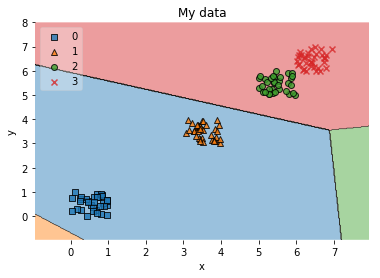

In [86]:
from mlxtend.plotting import plot_decision_regions

#print(train_labels.values)
plot_decision_regions(train_data.values, train_labels.values, clf=ppn, legend=2)

# Adding axes annotations
plt.xlabel('x')
plt.ylabel('y')
plt.title('My data')
plt.show()

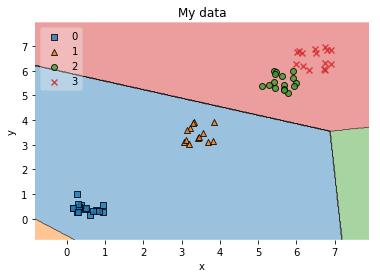

In [81]:
from mlxtend.plotting import plot_decision_regions

#print(test_data.values)
plot_decision_regions(test_data.values, test_labels.values, clf=ppn, legend=2)

# Adding axes annotations
plt.xlabel('x')
plt.ylabel('y')
plt.title('My data')
plt.show()

In [78]:
import seaborn as sns
#train_data[['x','y','name']]
train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['x','y','name']], test_size = 0.3, random_state = 0)
sns.pairplot(test_data[['x','y','name']], hue = 'name')

ValueError: not enough values to unpack (expected 4, got 2)

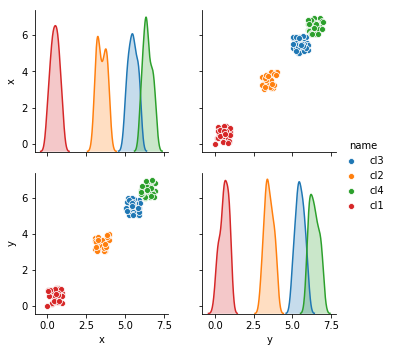

In [10]:
sns.pairplot(train_data[['x','y','name']], hue = 'name')